In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pyfooty.src.club import Club
from matplotlib.ticker import MultipleLocator

We will instantiate a `Club` object with `name="Chelsea FC"` and `year=2020`.  A `UserWarning` will be raised stating that an exact match for the `name` query wasn't found, and is set to the first search result.

In [2]:
chelsea = Club("Chelsea FC", 2020)

/Users/raymatsumoto/side-projects/pyfooty/pyfooty/src/club.py:171: UserWarning: Exact match for Chelsea FC not found.  Setting `name` to first search result: Chelsea FC
  warnings.warn(msg)


To look up the valid tables available for Chelsea in 2020, we will call the `valid_tables` attribute, which returns a tuple of all valid tables available to scrape from FBRef.

In [3]:
chelsea.valid_tables

('Standard Stats',
 'Scores & Fixtures',
 'Goalkeeping',
 'Advanced Goalkeeping',
 'Shooting',
 'Passing',
 'Pass Types',
 'Goal and Shot Creation',
 'Defensive Actions',
 'Possession',
 'Playing Time',
 'Miscellaneous Stats',
 'Regular Season, Premier League')

We will first look at the "Scores & Fixtures" table to look at overall trends of the club for 2020.  Since not all matches for the season have been played yet, we will remove the rows that don't yet have a result.

In [4]:
scores = chelsea.get_table("Scores & Fixtures")
scores.replace('', np.nan, inplace=True)
scores.dropna(subset=["result"], inplace=True)

In [5]:
scores.head()

,time,comp,round,dayofweek,venue,result,goals_for,goals_against,opponent,xg_for,xg_against,possession,attendance,captain,formation,referee,match_report,notes
0,20:15,Premier League,Matchweek 1,Mon,Away,W,3,1,Brighton,1.2,1.4,47.0,NaN,Jorginho,4-2-2-2,Craig Pawson,Match Report,NaN
1,16:30,Premier League,Matchweek 2,Sun,Home,L,0,2,Liverpool,1.0,2.6,39.0,NaN,Jorginho,4-3-3,Paul Tierney,Match Report,NaN
2,19:45,EFL Cup,Third round,Wed,Home,W,6,0,Barnsley,NaN,NaN,69.0,NaN,César Azpilicueta,4-2-3-1,Darren Bond,Match Report,NaN
3,17:30,Premier League,Matchweek 3,Sat,Away,D,3,3,West Brom,2.2,1.0,75.0,NaN,Thiago Silva,4-2-3-1,Jonathan Moss,Match Report,NaN
4,19:45,EFL Cup,Fourth round,Tue,Away,L,1 (4),1 (5),Tottenham,NaN,NaN,63.0,NaN,César Azpilicueta,4-2-3-1,Lee Mason,Match Report,Tottenham won on penalty kicks following norma...


First we will plot the overall win percentage for the 2020-21 season.

(1.0, 25.0)

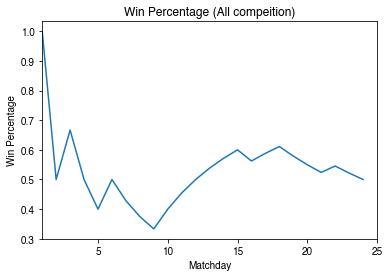

In [6]:
# Get win running win percentage
wins = 0
win_ratio = list()
for idx, result in enumerate(scores["result"]):
    if result == 'W':
        wins += 1
    win_ratio.append(wins / (idx+1))

# Plot win percentage
fig, ax = plt.subplots()
ax.set_title("Win Percentage (All compeition)")
ax.plot(range(1, len(win_ratio)+1), win_ratio)
ax.set_xlabel("Matchday")
ax.set_ylabel("Win Percentage")
ax.set_xlim((1, len(win_ratio)+1))

(1.0, 17.0)

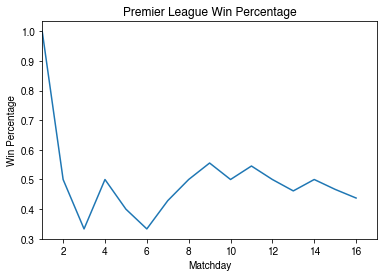

In [7]:
pl_scores = scores.loc[scores["comp"] == "Premier League"]
# Get win running win percentage
wins = 0
win_ratio = list()
for idx, result in enumerate(pl_scores["result"]):
    if result == 'W':
        wins += 1
    win_ratio.append(wins / (idx+1))

# Plot win percentage
fig, ax = plt.subplots()
ax.set_title("Premier League Win Percentage")
ax.plot(range(1, len(win_ratio)+1), win_ratio)
ax.set_xlabel("Matchday")
ax.set_ylabel("Win Percentage")
ax.set_xlim((1, len(win_ratio)+1))

Next let's plot the expected goals for and against.  To show how that correlates to the overall result, we will plot wins by blue, draws by black, and losses by red.

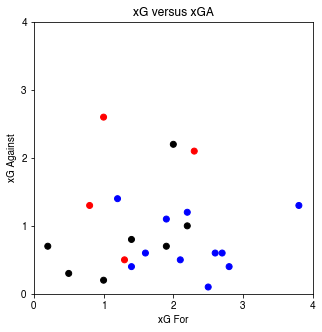

In [22]:
def result_color(result):
    """Dictionary to determine marker color by result"""
    color_dict = {
        "W": "blue",
        "D": "black",
        "L": "red",
    }
    
    return color_dict[result]

# Get colors
colors = list()
for result in scores["result"]:
    colors.append(result_color(result))

# Plot win percentage
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("xG versus xGA")
ax.scatter(scores["xg_for"], scores["xg_against"], color=colors)
ax.set_xlabel("xG For")
ax.set_ylabel("xG Against")
ax.set_xlim((0, 4))
ax.set_ylim((0, 4))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(1))

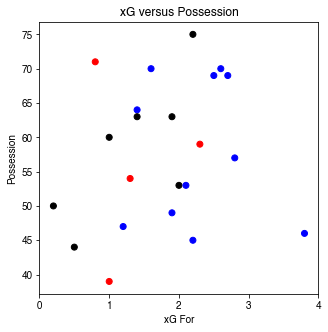

In [24]:
# Plot win percentage
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("xG versus Possession")
ax.scatter(scores["xg_for"], scores["possession"], color=colors)
ax.set_xlabel("xG For")
ax.set_ylabel("Possession")
ax.set_xlim((0, 4))
ax.xaxis.set_major_locator(MultipleLocator(1))